# Possibly-gapped Histogram of Iris Data

*Feb, 2017 by K.Wu*

**Iris Data is built-in in R.** _It is from [this webpage](https://archive.ics.uci.edu/ml/datasets/Iris) of UCI Machine Learning Repository. Or you can download its CSV file from the "data" folder [here](https://github.com/wklchris/Reports)._ 

## Read the data

Iris data has 5 features (columns), which are: 

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    - Setosa 
    - Versicolour 
    - Virginica
    
Use the object "iris" to access the data directly.

In [1]:
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


## Build the tree

We can build 4 trees based on sepal/petal length/width. Using euclidean distance.

Take sepal length as an example:

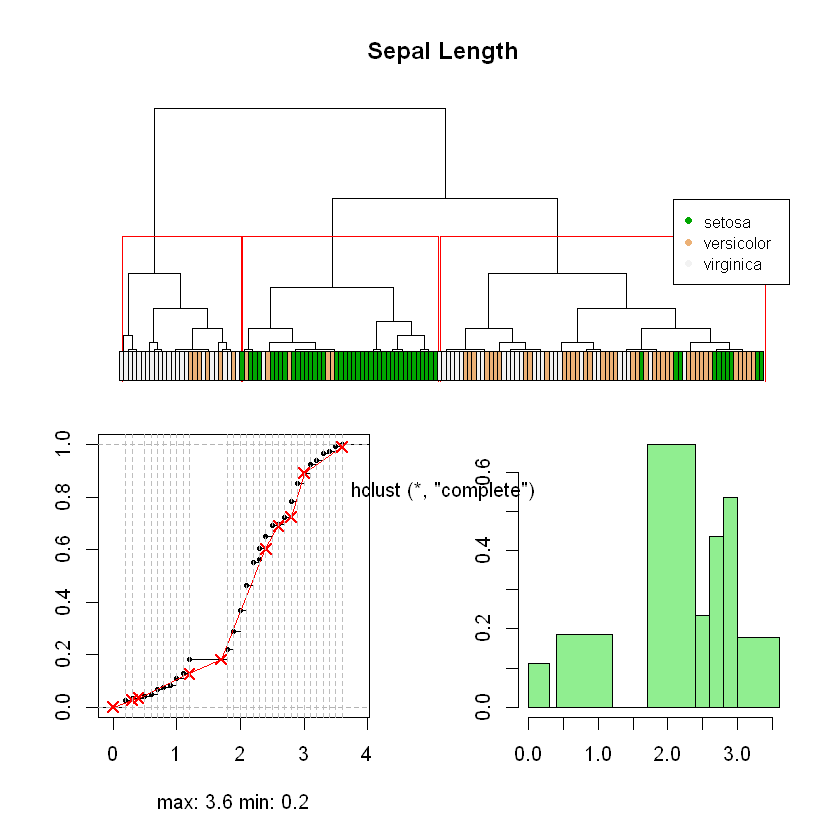

In [2]:
plot.tree <- function(vector, species=iris$Species, num=3, bins=1, 
                      layouts=c(0.4, 0.7, 0.6), title="",
                      cl_method="complete", is.return=TRUE) {
    # Plot a hierarchical tree based on 1-feature data. 
    # 
    # Args:
    #     vector: One-column data.
    #     species: A factor showing the class for each subject (row).
    #     num: Number of clusters.
    #     bins: Boundary points of bins for decoding.
    #     layouts: Drawing layouts. If length < 3, only draw the tree.
    #         Index 1~2: The height range of the colorbar.
    #         Index 3: The height of the lower 2 figures' top.
    #     title: The title of figure.
    #     cl_method: Method of HC algorithm.
    #
    # Returns:
    #     A sequence of order based on distance.
    
    d <- dist(vector, method="euclidean")
    hc <- hclust(d, method=cl_method)
    rect.colors <- terrain.colors(num)
    
    # Main tree figure
    par(fig=c(0, 1, layouts[1], 1))
    plot(hc, hang=-1, labels=FALSE, axes=FALSE, xlab="", ylab="", main=title)
    rect.hclust(hc, k=num)
    legend("right", names(table(iris$Species)), cex=0.8, pch=16, col=rect.colors)
    
    par(fig=c(0, 1, layouts[1:2]), new=TRUE)
    plot(c(1, length(vector)), c(0, 1), type="n", axes=F, xlab="", ylab="", main="", sub="")
    # rect(seq(1,150)-1, 0, seq(1, 150), 1, col=rect.colors[cutree(hc, k=num)[hc$order]])
    rect(seq(1,length(vector))-1, 0, seq(1,length(vector)), 1, col=rect.colors[factor(species)[hc$order]])
    
    # Distance between each two subjects under the HC-order sequence
    x <- data.frame(Order=hc$order, Value=vector[hc$order], Max=NA, Min=NA, Dist=NA)
    x$Max[1] <- x$Value[1]
    x$Min[1] <- x$Value[1]
    for (row in seq(2, length(vector))) {
        y <- x$Value[row]
        x$Dist[row] <- max(abs(y-x$Max[row-1]), abs(y-x$Min[row-1]))
        x$Max[row] <- max(y, x$Max[row-1])
        x$Min[row] <- min(y, x$Min[row-1])
    }
    
    if (length(layouts) > 2) {
        # Lower-left CDF figure
        par(fig=c(0, 0.5, 0, layouts[3]), new=TRUE)
        f.ecd <- ecdf(x$Dist)
        uniq.ecd <- knots(f.ecd)
        plot(f.ecd, verticals=F, do.points=T, cex=0.5,
             xlab=paste("max:", uniq.ecd[length(uniq.ecd)], "min:", uniq.ecd[1]),
             ylab="", main="")
        if (length(bins) > 1) {
            points(bins, f.ecd(bins), pch=4, col="red", lwd=2, cex=1.2)
            lines(bins, f.ecd(bins), col="red")
        }
        abline(v=uniq.ecd, lty=2, col="gray")

        # Lower-right Possibly-gapped Hist
        par(fig=c(0.5, 1, 0, layouts[3]), new=TRUE)
        if (length(bins) > 1) {
            hist(x$Dist, breaks=bins, col="lightgreen", xlab="", ylab="", main="")
        } else {
            hist(x$Dist, col="lightgreen", xlab="", ylab="", main="")
        }
    }
    if (is.return == TRUE) { return(x) }
}

bins.SL <- c(0, 0.3, 0.4, 1.2, 1.7, 2.4, 2.6, 2.8, 3, 3.6)
iris.SL <- plot.tree(iris$Sepal.Length, num=3, title="Sepal Length", bins=bins.SL)

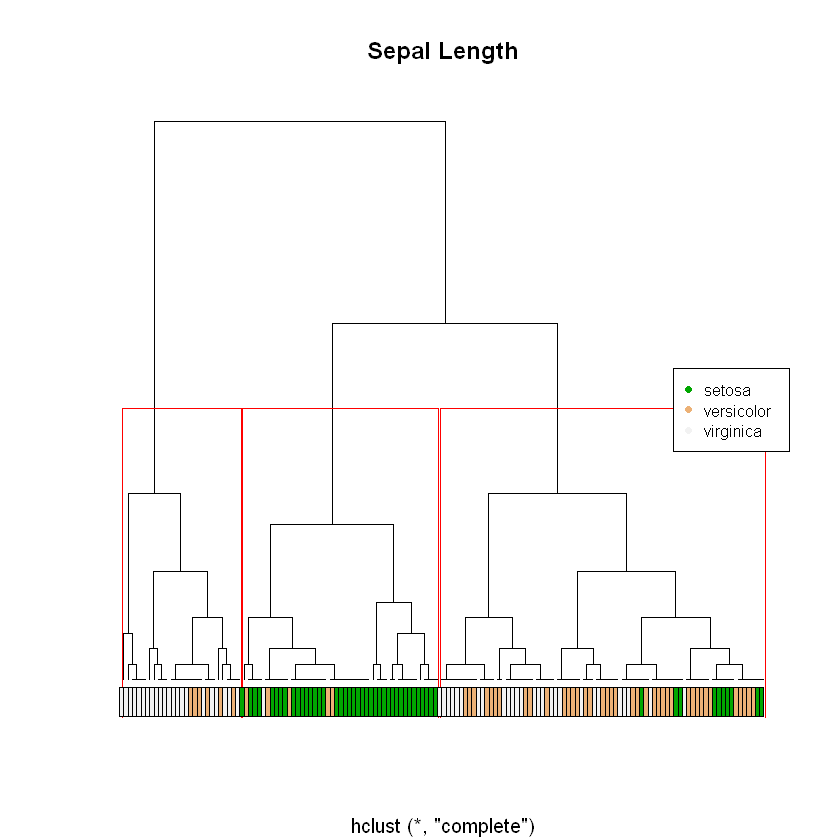

In [3]:
plot.tree(iris$Sepal.Length, num=3, title="Sepal Length",
          layouts=c(0,0.3), is.return=F)